# Bayesian Algorithm for Indoor Localization 


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### Generating Synthetic DataSet

In [24]:
locations = ['Location1', 'Location2', 'Location3', 'Location4']
n_samples = 100  # Number of samples per location
n_aps = 3  # Number of access points (RSSI readings per sample)
std_dev = 5  # Standard deviation for noise in RSSI readings

### Define Bayes Localization Algorithm

In [25]:
true_rssi = {
    'Location1': [-50, -70, -60],
    'Location2': [-40, -60, -70],
    'Location3': [-60, -80, -50],
    'Location4': [-70, -60, -40]
}

In [26]:
data = []

for location in locations:
    for _ in range(n_samples):
        rssi_values = [np.random.normal(loc=true_rssi[location][i], scale=std_dev) for i in range(n_aps)]
        data.append([location] + rssi_values)

In [27]:
columns = ['Location'] + [f'RSSI_AP{i+1}' for i in range(n_aps)]
df = pd.DataFrame(data, columns=columns)
csv_filename = 'synthetic_localization_data.csv'
df.to_csv(csv_filename, index=False)

print(f"Synthetic CSV file '{csv_filename}' created successfully!")


Synthetic CSV file 'synthetic_localization_data.csv' created successfully!


In [28]:
location_rssi = {
    'Location1': [-50, -70, -60],
    'Location2': [-40, -60, -70],
    'Location3': [-60, -80, -50],
    'Location4': [-70, -60, -40]
}

priors = {
    'Location1': 0.25,
    'Location2': 0.25,
    'Location3': 0.25,
    'Location4': 0.25
}

def likelihood(rssi_readings, location_rssi_values, std_dev=5):
    rssi_readings = np.array(rssi_readings, dtype=float)
    location_rssi_values = np.array(location_rssi_values, dtype=float)
    differences = (rssi_readings - location_rssi_values) / std_dev
    exponent = -0.5 * (differences ** 2)
    likelihood_values = np.exp(exponent)
    return np.prod(likelihood_values)

def bayes_localization(rssi_readings):
    posteriors = {}
    for location, rssi_values in location_rssi.items():
        likelihood_value = likelihood(rssi_readings, rssi_values)
        posteriors[location] = likelihood_value * priors[location]

    total_posterior = sum(posteriors.values())
    for location in posteriors:
        posteriors[location] /= total_posterior

    return posteriors



In [29]:
def simulate_localization_from_csv(csv_file):
    data = pd.read_csv(csv_file)
    
    true_labels = []
    predicted_labels = []
    
    for index, row in data.iterrows():
        true_location = row['Location']
        rssi_readings = row[1:].values 
        
        posterior_probs = bayes_localization(rssi_readings)
        
        

        predicted_location = max(posterior_probs, key=posterior_probs.get)
        true_labels.append(true_location)
        predicted_labels.append(predicted_location)

    return true_labels, predicted_labels

<Figure size 1000x700 with 0 Axes>

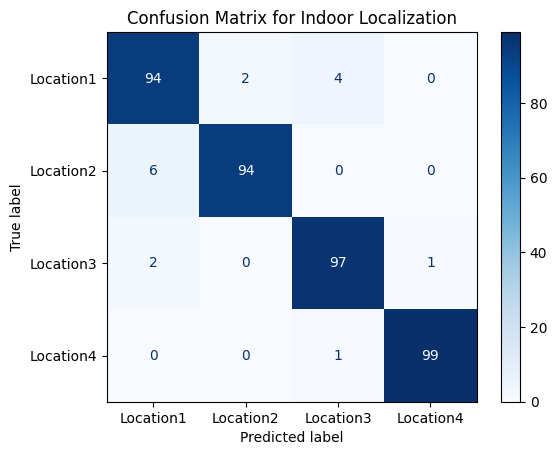

In [30]:
csv_filename = 'synthetic_localization_data.csv'
true_labels, predicted_labels = simulate_localization_from_csv(csv_filename)

cm = confusion_matrix(true_labels, predicted_labels, labels=list(location_rssi.keys()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(location_rssi.keys()))


plt.figure(figsize=(10, 7)) 
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Indoor Localization")
plt.show()